In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly

%matplotlib inline
plt.rcParams['figure.figsize'] = [15,15]
plt.style.use('default')
plt.rcParams['lines.markersize'] = 8
plt.rcParams.update({'font.size': 12})

# Function Definitions

In [38]:
"""X.shape = (N, dim)"""

class ex2:
    def __init__(self):
        pass
    
    def f(self, X):
        x1, x2, x3 = X
        return (x1 - 4)**4 + (x2 - 3)**2 + 4*(x3 + 5)**4
    
    def f1(self, X):
        x1, x2, x3 = X
        return np.array([4*(x1 - 4)**3, 2*(x2 - 3), 16*(x3 + 5)**3])
    
class ex3:
    def __init__(self):
        pass
    
    def f(self, X):
        x1, x2 = X
        return 100*(x2 - x1**2)**2 + (1 - x1)**2
    
    def f1(self, X):
        x1, x2 = X
        return np.array([-200*(x2 - x1**2)*(2*x1) - 2*(1 - x1), 200*(x2 - x1**2)])
    

# Gradient Descent Implementation 

Recall that 
$$
\partial_{d} F(x) = \frac{d}{d\alpha} F(x + \alpha d) \\
= \nabla F(x)^T d
$$

In [57]:
def exact_line_search(F, x_0, step_size, eps):
    direction = -F.f1(x_0)/np.linalg.norm(F.f1(x_0))
    curr_dir = F.f1(x_0) @ direction 
    alpha = 0
    while abs(curr_dir) > eps:
        alpha -= step_size*curr_dir 
        curr_dir = F.f1(x_0 + alpha * direction) @ direction
        
    return x_0 + alpha*direction
        

def gradient_descent(F, x_0, line_serach_steps_size, eps):
    res = [x_0]
    curr_f1 = F.f1(x_0)
    
    while np.linalg.norm(curr_f1) > eps:
        
        next_x = exact_line_search(F, x_0, line_serach_steps_size, eps)
        x_0 = next_x
        res.append(x_0)
        curr_f1 = F.f1(x_0)
        
    return np.array(res)
    

# Run Gradient Descent for both Ex2 and Ex3

In [64]:
F = ex2()
x_0 = np.array([-4, 5, 1])
line_serach_steps_size = 1e-3
eps = 1e-4
gradient_descent(F, x_0, line_serach_steps_size, eps)

array([[-4.        ,  5.        ,  1.        ],
       [ 0.6165042 ,  4.99098339, -6.79035084],
       [ 4.00481808,  4.9039022 , -4.78236275],
       [ 4.00481786,  2.99919492, -4.86486642],
       [ 4.00481666,  3.00352578, -4.97106384],
       [ 4.00481644,  3.00003962, -4.97125549],
       [ 4.00481363,  2.99954224, -4.97364099],
       [ 4.00481341,  2.9999937 , -4.97378549],
       [ 4.00480347,  3.00027429, -4.98020719],
       [ 4.00480328,  3.00003729, -4.98026078],
       [ 4.00480303,  2.99999596, -4.98032898],
       [ 4.00480001,  3.00005108, -4.98116018],
       [ 4.00479986,  3.00001667, -4.98119623],
       [ 4.00479963,  2.99999898, -4.98125268],
       [ 4.00479831,  3.00000507, -4.98156673],
       [ 4.00479822,  3.00000306, -4.9815866 ],
       [ 4.00479821,  3.00000286, -4.98158989],
       [ 4.00479821,  3.00000285, -4.98158999]])

In [68]:
F = ex3()
x_0 = np.array([-2, 2])
line_serach_steps_size = 1e-3
eps = 1e-4
res3 = gradient_descent(F, x_0, line_serach_steps_size, eps)

# Ex3 Demonstration

In [71]:
lb, ub = -2.4, 2.4

Xs = np.linspace(lb, ub, 100)
XY = np.meshgrid(Xs, Xs)
X_inp = np.vstack([x.flatten() for x in XY]).T
Fs = np.array([F.f(x) for x in X_inp]).reshape(100, 100)

Fs_log = np.log(Fs)



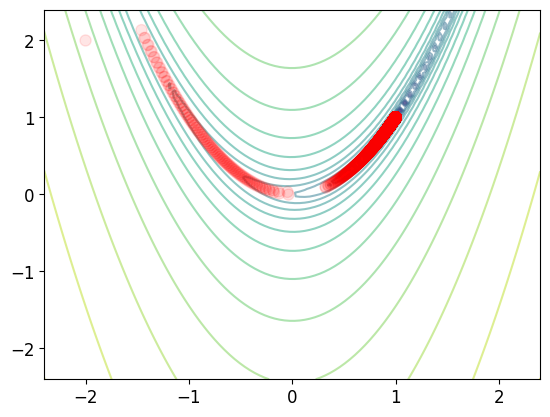

In [72]:
# plt.contour(XY[0], XY[1], Fs, levels=20, zorder=-1, alpha=0.5)
plt.contour(XY[0], XY[1], Fs_log, levels=20, zorder=-1, alpha=0.5)



alphas = np.linspace(0.1, 1, len(res3))
rgba_colors = np.zeros((len(res3),4))
# for red the first column needs to be one
rgba_colors[:,0] = 1.0
# the fourth column needs to be your alphas
rgba_colors[:, 3] = alphas

plt.scatter(res3[:, 0], res3[:, 1], zorder=1, color=rgba_colors)

# Line Search Demonstration 


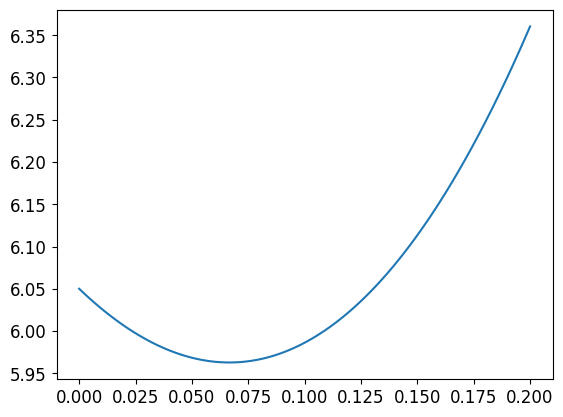

In [56]:
x_0 = res3[1]
direction = -F.f1(x_0)

lb, ub = 0, 0.2
alphas = np.linspace(lb, ub, 100)
Fs = np.array([F.f(x_0 + alpha*direction) for alpha in alphas])
plt.plot(alphas, Fs)